<a href="https://colab.research.google.com/github/PacTal/Physics/blob/main/Oscilaciones_amortiguadas_forzadas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Oscilaciones en 1D
La ecuación diferencial
$$
\frac{d^2x}{dt^2}+\frac{b}{m}\frac{dx}{dt}+\omega_{o}^2x=\frac{F_o}{m}\cos(\omega_f t)
$$
La aceleración es:
$$
a(x)=-\frac{b}{m}v-\omega_{o}^2x+\frac{F_o}{m}\cos(\omega_f t)
$$

In [ ]:
#---librerias pertinente
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#---Parámetros
m=2         #---masa del bloque en Kg
k=5         #---Constante de eláticidad N/m
b=0.2      # Coeficiente de fricción con el medio N/(m/s)
Fo=0.8      # Amplitud de la fuerza externa en N.
wf=1.5      # Frecuencia de la fuerza externa en Hz. (rad/s)
Tm=128.      # Tiempo máximo segundos
dt=0.001    #Incremento en el tiempo en s.
#---Condiciones iniciales---xxxxxxxx
xo=1.0      #--posición en
vo=0.0      #--velocidad en metros/segundo
periodo=2*np.pi*np.sqrt(m/k)  # periodo del oscilador libre MAS
print("Periodo Osc. Libre= ",round(periodo,3))

Periodo Osc. Libre=  3.974


# Función aceleración
Se implementa la funci+on aceleración:
La aceleración es:
$$
a(x)=-\frac{b}{m}v-\omega_{o}^2x+\frac{F_o}{m}\cos(\omega_f t)
$$

In [ ]:
#---Función aceleración
def a(v,x,t):
  ao=Fo/m
  bo=b/m
  wo=np.sqrt(k/m)
  ace=ao*np.cos(wf*t)-bo*v-wo*wo*x
  return round(ace,2)
#----

In [ ]:
#--Ciclo principal
X,T=[],[] #--Listas de posición y tiempo
V,A=[],[]# --VELOCIDAD--Aceleracion
Ec,Ep,Em=[],[],[] #--Energía
t=0.
x,v=xo,vo

while t<=Tm:
  T.append(t)
  X.append(x)
  V.append(v)
  A.append(a(v,x,t))
  ep=0.5*k*x**2
  ec=0.5*m*v**2
  em=ep+ec
  Ec.append(ec)  #---energía
  Ep.append(ep)
  Em.append(em)
  kx1=v*dt     #inicio de paso de runge kutta 4 orden  No se toca leyes de la naturaleza
  kv1=a(v,x,t)*dt
  kx2=(v+0.5*kv1)*dt
  kv2=a(v+0.5*kv1,x+0.5*kx1,t+0.5*dt)*dt
  kx3=(v+0.5*kv2)*dt
  kv3=a(v+0.5*kv2,x+0.5*kx2,t+0.5*dt)*dt
  kx4=(v+kv3)*dt
  kv4=a(v+kv3,x+kx3,t+dt)*dt
  x=x+(kx1+2*kx2+2*kx3+kx4)/6.0
  v=v+(kv1+2*kv2+2*kv3+kv4)/6.0      #fin de paso de rungekutta 4 orden
  t=t+dt

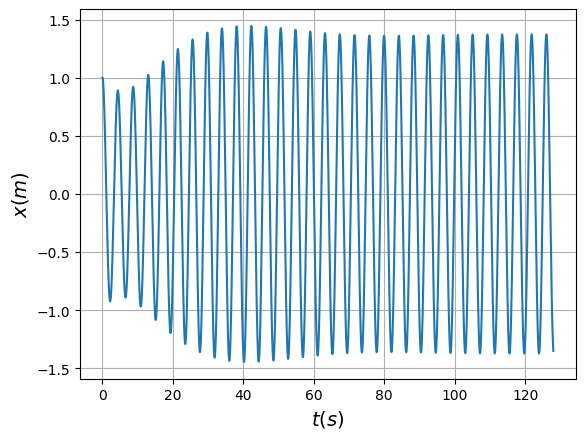

In [ ]:
plt.plot(T,X)
plt.xlabel('$t(s)$',fontsize=14)
plt.ylabel(r'$x(m)$',fontsize=14)
plt.grid()
plt.show()

#Energía

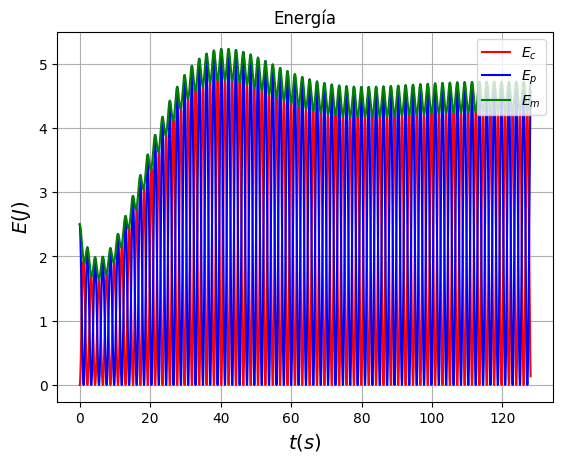

In [ ]:
plt.plot(T,Ec,color="red",label='$E_c$')
plt.plot(T,Ep,color="blue",label='$E_p$')
plt.plot(T,Em,color="green",label='$E_m$')
plt.xlabel('$t(s)$',fontsize=14)
plt.ylabel(r'$E(J)$',fontsize=14)
plt.legend(loc='upper right') #---lower center, lower right, upper left
plt.title(u'Energía')
plt.grid()
plt.show()

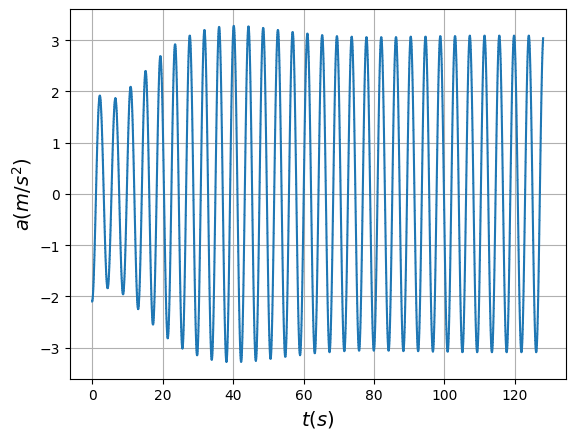

In [ ]:
plt.plot(T,A)
plt.xlabel('$t(s)$',fontsize=14)
plt.ylabel(r'$a(m/s^2)$',fontsize=14)
plt.grid()
plt.show()